# Natural Language Processing

## Exercise Sheet 2
### Varun Devgon - 11849004

In [251]:
#imports for all exercises
import nltk
from nltk import FreqDist, bigrams, ConditionalFreqDist
from nltk.corpus import inaugural, names, brown, stopwords, udhr, wordnet
import matplotlib.pylab as plt

### Exercise 1

Plot the conditional frequency distribution of how the usage of the words "men", "women", and "people" has changed over time in the Inaugural Address Corpus.


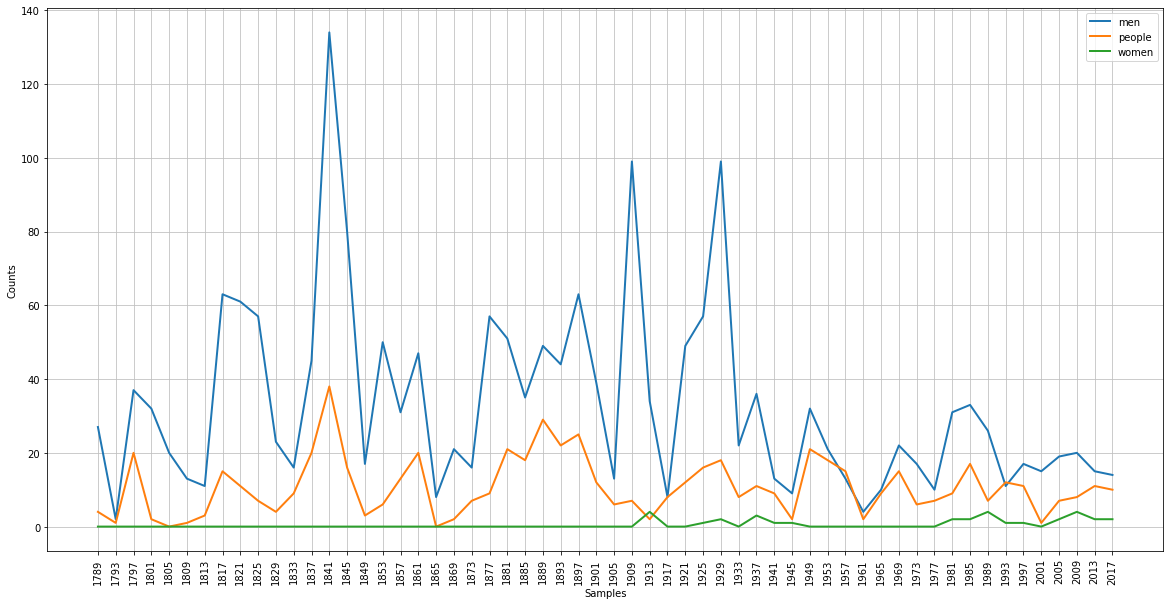

In [252]:
plt.rcParams['figure.figsize'] = [20,10]

cfd = ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['men', 'women', 'people']
    if target in w.lower())
cfd.plot()

### Exercise 2

Plot a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males vs. females.

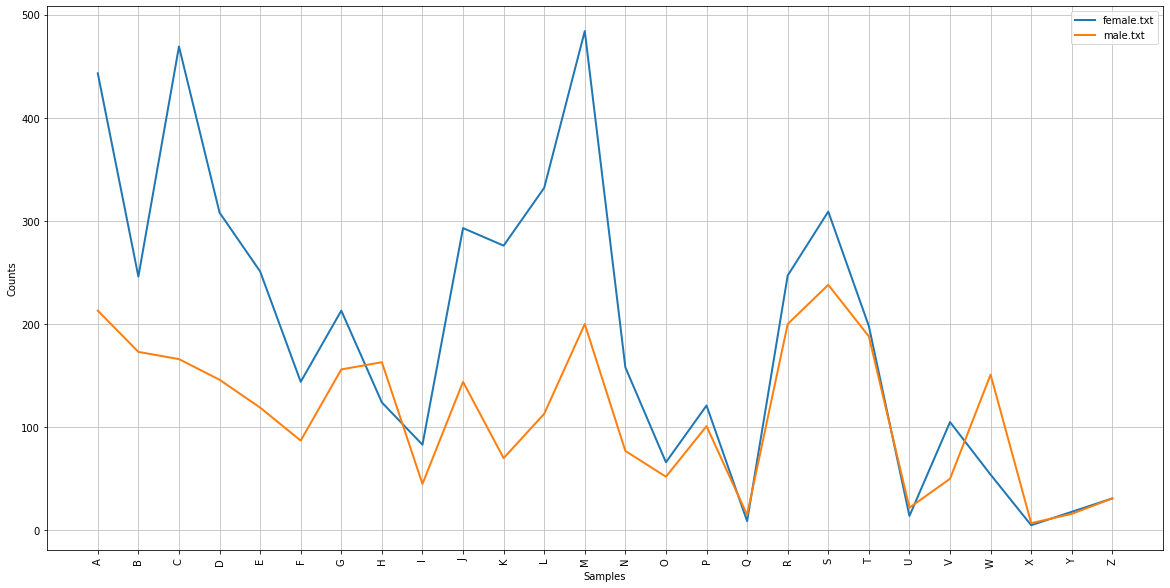

In [253]:
cfd = ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

### Exercise 3

What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [308]:
nohypo_nouns = sum(1 for w in wordnet.all_synsets('n') if len(w.hyponyms()) == 0)
all_nouns = len(list(wordnet.all_synsets('n')))
"{}%".format(nohypo_nouns/all_nouns*100)

'79.67119283931072%'

### Exercise 4

Define a function `supergloss(s)` that takes a synset $s$ as its argument and returns a string consisting of the concatenation of the definition of $s$, and the definitions of all the hypernyms and hyponyms of $s$. Apply the function to the synset "car.n.01".

In [376]:
def supergloss(s):
    synset = wordnet.synset(s)
    synset_def = [synset.definition()]
    hypernyms_defs = [w.definition() for w in synset.hypernyms()]
    hyponyms_defs = [w.definition() for w in synset.hyponyms()]
    super_def = synset_def + hypernyms_defs + hyponyms_defs 
    return " ".join(super_def)

synset_text = 'car.n.01'
supergloss(synset_text)

"a motor vehicle with four wheels; usually propelled by an internal combustion engine a self-propelled wheeled vehicle that does not run on rails a vehicle that takes people to and from hospitals a car that has a long body and rear door with space behind rear seat a car that is old and unreliable a car driven by a person whose job is to take passengers where they want to go in exchange for money a small and economical car a car that has top that can be folded or removed a car with two doors and front seats and a luggage compartment a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters a car that is powered by electricity a car with relatively low fuel efficiency a car that resembles a convertible but has a fixed rigid top a car having a hatchback door an early term for an automobile a car modified to increase its speed and acceleration a car suitable for traveling over rough terrain large luxurious car; usually driven by a chauffeur a

### Exercise 5

Define a function to find all words that occur at least $n$ times in the Brown Corpus. Call the function with the value $n=200$.

In [89]:
def freq_words(words, fd, n):
    freqwords = [w for w in words if fd[w] >= n]
    return set(freqwords)

In [90]:
words = brown.words()
fdist1 = FreqDist(words)
freq_words(words,fdist1, 200)

{'!',
 "'",
 "''",
 '(',
 ')',
 ',',
 '--',
 '.',
 '1',
 '2',
 '3',
 '4',
 ':',
 ';',
 '?',
 'A',
 'Af',
 'After',
 'All',
 'American',
 'And',
 'As',
 'At',
 'But',
 'By',
 'For',
 'God',
 'He',
 'His',
 'How',
 'I',
 "I'm",
 'If',
 'In',
 'It',
 'John',
 'Miss',
 'Mr.',
 'Mrs.',
 'New',
 'No',
 'Now',
 'Of',
 'On',
 'One',
 'President',
 'She',
 'So',
 'Some',
 'State',
 'States',
 'That',
 'The',
 'Then',
 'There',
 'These',
 'They',
 'This',
 'To',
 'United',
 'Washington',
 'We',
 'What',
 'When',
 'With',
 'York',
 'You',
 '``',
 'a',
 'able',
 'about',
 'above',
 'across',
 'action',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'air',
 'all',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'am',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anything',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'asked',
 'at',
 'available',
 'away',
 'back',
 'be',
 'became',
 'because',
 'become',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'best',
 'better',
 'between',
 '

### Exercise 6

Write a program that lists the lexical diversity scores for all Brown Corpus genres, one per line.


In [63]:
def lexical_diversity(text):
    return len(set(text)) / len(text)
[lexical_diversity(brown.words(categories=w)) for w in brown.categories()]

[0.1279743878169075,
 0.10642071451679992,
 0.16054152327770924,
 0.1358194136199042,
 0.11667641228232811,
 0.14493897625842492,
 0.23125144042406084,
 0.09268890745953554,
 0.13148804612915801,
 0.12212912592488936,
 0.14314696580941583,
 0.1617553745018909,
 0.21192020440251572,
 0.12070492131044529,
 0.22342778161713892]

### Exercise 7

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. Apply the function to the "news" genre of the Brown Corpus. 



In [116]:
def fifty_most_common(text):
    text_without_stopwords = [w for w in text if w.lower() not in stopwords.words('english')]
    return FreqDist(text_without_stopwords).most_common(50)

In [117]:
fifty_most_common(brown.words(categories='news'))

[(',', 5188),
 ('.', 4030),
 ('``', 732),
 ("''", 702),
 ('said', 402),
 (';', 314),
 ('--', 300),
 ('Mrs.', 253),
 ('would', 244),
 ('one', 184),
 (')', 171),
 ('Mr.', 170),
 ('(', 168),
 ('last', 161),
 ('two', 157),
 (':', 149),
 ('new', 148),
 ('first', 143),
 ('year', 138),
 ('home', 127),
 ('also', 120),
 ('made', 107),
 ('years', 102),
 ('time', 97),
 ('three', 97),
 ('New', 93),
 ('state', 90),
 ('?', 90),
 ('President', 89),
 ('week', 86),
 ('could', 86),
 ('four', 73),
 ('man', 72),
 ('House', 71),
 ('back', 69),
 ('members', 69),
 ('American', 67),
 ('may', 66),
 ('program', 66),
 ('work', 66),
 ('get', 66),
 ('Kennedy', 66),
 ('John', 65),
 ('school', 65),
 ('night', 64),
 ('State', 63),
 ('meeting', 62),
 ('since', 61),
 ('per', 61),
 ('day', 61)]

### Exercise 8

Write a function that finds the 50 most frequently occurring bigrams of a text, omitting bigrams that contain stopwords. Apply the function to the "news" genre of the Brown Corpus. 


In [379]:
def common_bigrams(text):
    text_without_stopwords = [w for w in text if w.lower() not in stopwords.words('english')]
    return FreqDist(list(bigrams(text_without_stopwords))).most_common(50)

In [380]:
common_bigrams(brown.words(categories='news'))

[(("''", '.'), 294),
 (('.', '``'), 245),
 (("''", ','), 199),
 ((';', ';'), 157),
 ((',', '``'), 122),
 ((',', 'said'), 114),
 ((',', 'Mrs.'), 84),
 (('said', '.'), 78),
 (('said', ','), 74),
 (('.', 'Mr.'), 65),
 (('New', 'York'), 52),
 (('per', 'cent'), 50),
 ((':', '``'), 46),
 (('.', 'Mrs.'), 46),
 (('?', '?'), 45),
 (('Mr.', 'Mrs.'), 42),
 (('year', '.'), 37),
 (('United', 'States'), 37),
 ((',', 'Mr.'), 37),
 ((',', 'however'), 33),
 (('.', ','), 31),
 (('last', 'year'), 31),
 (('however', ','), 30),
 ((',', 'would'), 30),
 (('White', 'House'), 29),
 (('last', 'week'), 29),
 (('Jr.', ','), 28),
 (('.', 'said'), 27),
 (('week', '.'), 26),
 ((')', '--'), 26),
 ((',', ','), 25),
 ((',', 'says'), 23),
 ((')', '.'), 23),
 (('home', 'runs'), 23),
 (('.', '('), 22),
 ((',', 'according'), 22),
 ((',', 'one'), 22),
 (('.', 'One'), 22),
 ((',', 'two'), 21),
 ((',', 'also'), 21),
 (('.', 'also'), 20),
 (("''", '?'), 20),
 (('year', ','), 20),
 (('U.', 'S.'), 20),
 (('.', 'first'), 20),
 ((

### Exercise 9

Write a function `word_freq()` that takes a word and the name of a Brown Corpus genre as arguments, and computes the frequency of the word in that section of the corpus. Use the function to compute the frequency of "love" in "news" vs. "romance" genre.

In [178]:
def word_freq(word,genre):
    try:
        fdist = FreqDist(brown.words(categories=genre))
    except:
        return '{} is not a valid Brown Corpus genre'.format(genre)
    return fdist[word]

In [181]:
word_freq('love','news')

3

In [182]:
word_freq('love','romance')

32

### Exercise 10

Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the Universal Declaration of Human Rights Corpus and limit your searches to files in the Latin-1 encoding. Use the function to find the languages for the string "basis".


In [249]:
def find_language(word):
    latin_langs = [w for w in udhr.fileids() if 'Latin1' in w]
    found_langs = [l for l in latin_langs if word in udhr.words(l)]
    return found_langs

find_language("basis")

['Afrikaans-Latin1', 'English-Latin1']

### Exercise 11

What is the branching factor of the noun hypernym hierarchy, i.e. for every noun synset that has hyponyms, how many do they have on average? 

In [394]:
has_hyponouns = sum(1 for w in wordnet.all_synsets('n') if len(w.hyponyms()) > 0)
hypo_nouns = sum(len(w.hyponyms()) for w in wordnet.all_synsets('n'))
branching_factor = hypo_nouns/has_hyponouns

In [395]:
branching_factor

4.543820763194153